# Denoising AutoEncoder with conv

In [1]:
import tensorflow.keras as k
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import numpy as np
from data_util import *

## Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = load_mnist()

x_train: (60000, 28, 28)
y_train: (60000, 10)
x_test: (10000, 28, 28)
y_test: (10000, 10)


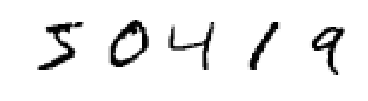

In [3]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)
show_mnist(x_train[:5])

### Add Noise

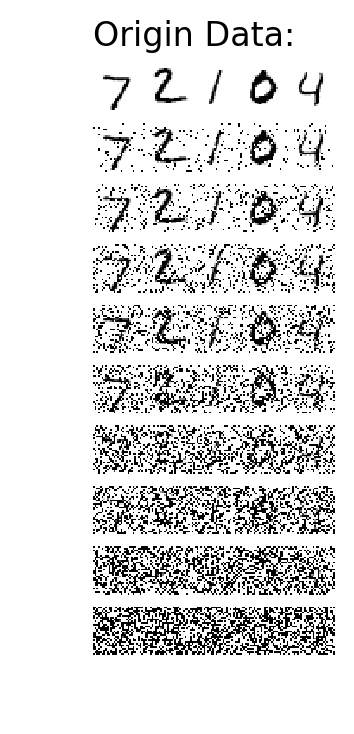

In [4]:
show_mnist_comp(x_test[:5],title="Origin Data:", loc = "left")

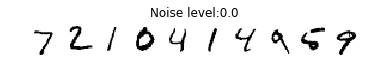

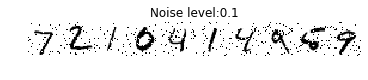

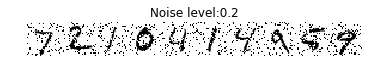

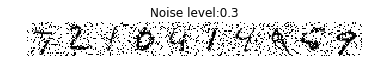

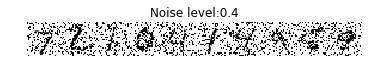

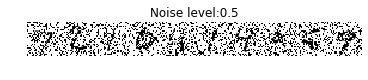

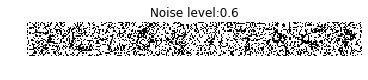

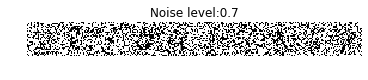

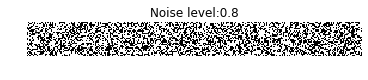

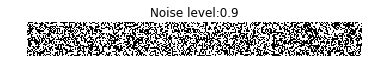

In [8]:
for level in range(10):
    noise_level = level / 10
    x_test_noise = sap_noise(x_test[:10], noise_level)
    show_mnist(x_test_noise, title = "Noise level:"+ str(noise_level))### Generate Noise data

## Load Model

In [5]:
dae = k.models.load_model("models/dae.h5")
dae_conv = k.models.load_model("models/dae_conv.h5")
dae_n = k.models.load_model("models/dae_noise9.h5")
dae_conv_n = k.models.load_model("models/dae_conv_noise9.h5")

In [ ]:
models = [dae, dae_n, dae_conv, dae_conv_n]

## Reconstruct in Different Noise Level

### Reconstruct

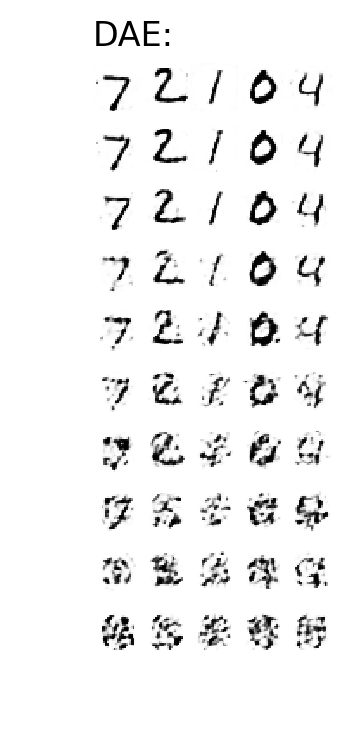

In [28]:
show_mnist_comp(x_test[:5],model=dae, title="DAE:", loc = "left")

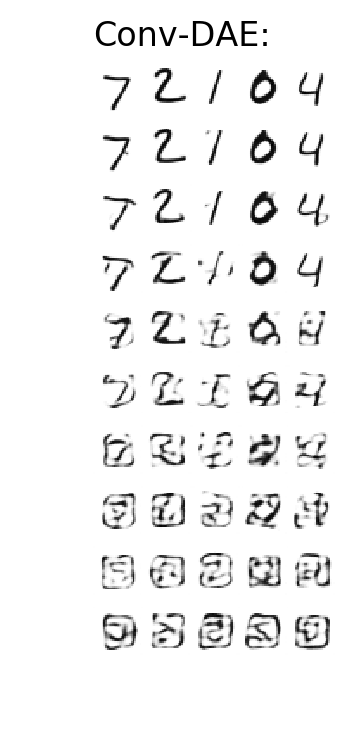

In [29]:
show_mnist_comp(x_test[:5],model=dae_conv, title="Conv-DAE:", loc = "left")

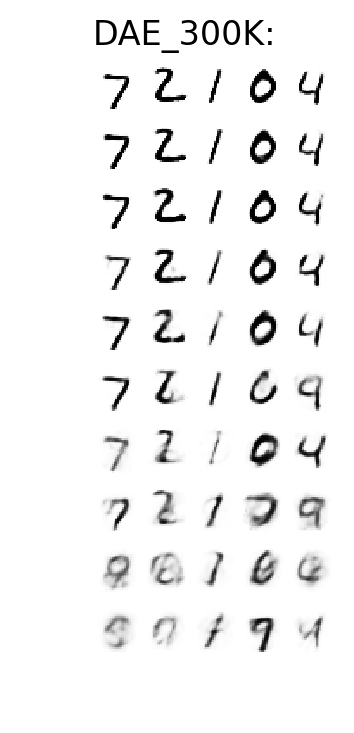

In [30]:
show_mnist_comp(x_test[:5],model=dae_n, title="DAE_300K:", loc = "left")

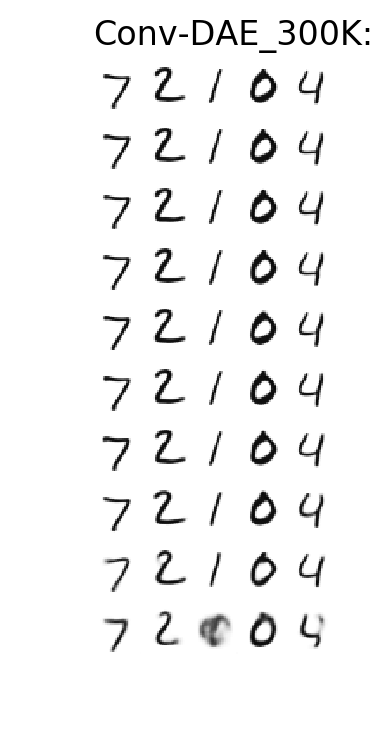

In [31]:
show_mnist_comp(x_test[:5],model=dae_conv_n, title="Conv-DAE_300K:", loc = "left")

In [13]:
def evaluate_mse(model):
    hists = []
    for i in range(10):
        level = i / 10
        x_test_noisy = sap_noise(x_test, level)
        hist = model.evaluate(x_test_noisy,x_test,verbose = 0)
        hists.append(hist)
    return hists

In [16]:
hist_dae = evaluate_mse(dae)
hist_dae_conv = evaluate_mse(dae_conv)

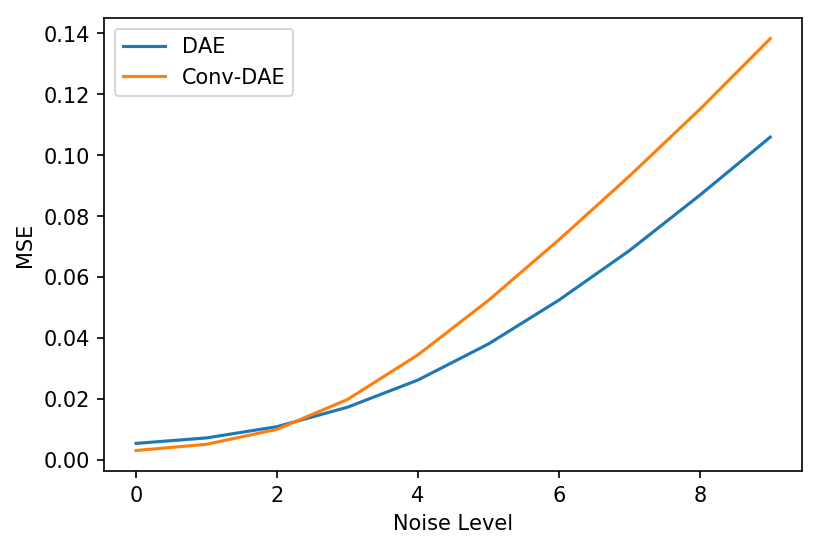

In [35]:
plt.figure(dpi=150)
plt.plot(hist_dae, label = "DAE")
plt.plot(hist_dae_conv, label = "Conv-DAE")
plt.xlabel("Noise Level")
plt.ylabel("MSE")
plt.legend()

In [20]:
hist_dae_n = evaluate_mse(dae_n)
hist_dae_conv_n = evaluate_mse(dae_conv_n)

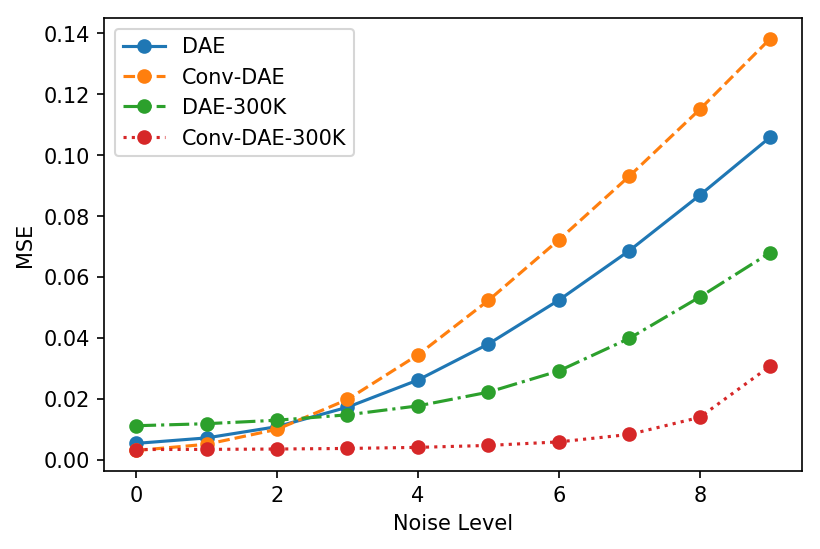

In [33]:
plt.figure(dpi=150)
plt.plot(hist_dae,"-o",label = "DAE")
plt.plot(hist_dae_conv, "--o", label = "Conv-DAE")
plt.plot(hist_dae_n, "-.o", label = "DAE-300K")
plt.plot(hist_dae_conv_n, ":o", label = "Conv-DAE-300K")
plt.xlabel("Noise Level")
plt.ylabel("MSE")
plt.legend()